# **Pobieranie i wstępna analiza danych z Twittera**

**Autorka:** Agnieszka Karlińska


![](https://raw.githubusercontent.com/tzoltak/3502-SCC-ADR/master/belka_gorna.png)

In [ ]:
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import collections
from wordcloud import WordCloud

## Pozyskiwanie danych

In [ ]:
# Podajemy dane uwierzytelniające(do uzupełnienia):
consumer_key = "XXXXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXXXX"
access_token = "XXXXXX-XXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXX"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth) 

Jeśli chcemy zebrać większą pulę danych i  ominąć limity, warto zdefiniować dodatkowe argumenty:

*   etry_count – default number of retries to attempt when error occurs
*   retry_delay – number of seconds to wait between retries
*   retry_errors – which HTTP status codes to retry
*   wait_on_rate_limit – whether or not to automatically wait for rate limits to replenish
*   wait_on_rate_limit_notify – whether or not to print a notification when Tweepy is waiting for rate limits to replenish

Więcej na ten temat w [dokumentacji](https://docs.tweepy.org/en/v3.10.0/api.html) pakietu `tweeepy`


In [ ]:
# Przykładowe wywołanie:
api_2 = tweepy.API(auth, 
                 retry_count = 5,
                 retry_delay = 10,
                 retry_errors = set([401, 404, 500, 503]),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

### Tweety konkretnego użytkownika/użytkowniczki 

In [ ]:
results = api.user_timeline(id = 'AndrzejDuda', count = 5, include_rts = True) 

In [ ]:
status = results[0]
print("Tweet:", status.text)

Tweet: 120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckie… https://t.co/ikcD9xjVez


In [ ]:
# Do jakich danych mamy dostęp?
for key,value in status.__dict__.items(): 
    print(key)

_api
_json
created_at
id
id_str
text
truncated
entities
source
source_url
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
author
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


In [ ]:
# Żeby uzyskać pełne teksty tweetów, dodajemy argument "tweet_mode":
results = api.user_timeline(id = 'AndrzejDuda', count = 5, include_rts = True, tweet_mode = "extended") 

In [ ]:
status = results[0]
print("Tweet:", status.full_text)

Tweet: 120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.
Pamięć! 🇵🇱
#DzieńRotmistrza https://t.co/FSxmrJ9IgS


In [ ]:
# Treść wszystkich pozyskanych tweetów:
for tweet in results:
   print(tweet.full_text)

120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.
Pamięć! 🇵🇱
#DzieńRotmistrza https://t.co/FSxmrJ9IgS
Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.
Dziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2
Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN
Jestem wstrząśnięty śmiercią funkcjonariusza Policji mł. asp. Michała Kędzierskiego. Zginął na służbie zabity przez bandytę. Nie ma zgody, aby ktokolwiek podnosił rękę na tych, którzy narażaj

In [ ]:
# W wersji bardziej czytelnej:
i = 1
for tweet in results:
    print(str(i) +'. '+ tweet.full_text + '\n')
    i= i+1

1. 120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.
Pamięć! 🇵🇱
#DzieńRotmistrza https://t.co/FSxmrJ9IgS

2. Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.
Dziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2

3. Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN

4. Jestem wstrząśnięty śmiercią funkcjonariusza Policji mł. asp. Michała Kędzierskiego. Zginął na służbie zabity przez bandytę. Nie ma zgody, aby ktokolwiek podnosił rękę na tych,

In [ ]:
# Dodatkowe informacje:
i = 1
for tweet in results:
    print(str(i) +'. '+ tweet.full_text + '\n' + 'liczba polubień: ' + str(tweet.favorite_count) + '\n')
    i= i+1

1. 120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.
Pamięć! 🇵🇱
#DzieńRotmistrza https://t.co/FSxmrJ9IgS
liczba polubień: 2381

2. Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.
Dziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2
liczba polubień: 531

3. Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN
liczba polubień: 527

4. Jestem wstrząśnięty śmiercią funkcjonariusza Policji mł. asp. Michała Kędzierskiego. Zginął na służbie zabity pr

#### Pozyskiwanie tweetów z `Cursor()`

Więcej w [dokumentacji](https://docs.tweepy.org/en/v3.10.0/cursor_tutorial.html)

In [ ]:
# Ile tweetów w praktyce pobieramy?
results = api.user_timeline(id = 'AndrzejDuda', count = 500, include_rts = True) 
len(results)

200

In [ ]:
tweets = tweepy.Cursor(api.user_timeline, id = 'AndrzejDuda', tweet_mode = "extended").items(3)

In [ ]:
# Co otrzymujemy?
tweets

In [ ]:
# Co jest w środku?
for tweet in tweets:
  print(tweet)

Status(_api=<tweepy.api.API object at 0x7f4c7adde5d0>, _json={'created_at': 'Thu May 13 07:12:14 +0000 2021', 'id': 1392739446311768064, 'id_str': '1392739446311768064', 'full_text': '120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.\nPamięć! 🇵🇱\n#DzieńRotmistrza https://t.co/FSxmrJ9IgS', 'truncated': False, 'display_text_range': [0, 188], 'entities': {'hashtags': [{'text': 'DzieńRotmistrza', 'indices': [172, 188]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1392739442482458631, 'id_str': '1392739442482458631', 'indices': [189, 212], 'media_url': 'http://pbs.twimg.com/media/E1QBJNXXsAcJQB8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E1QBJNXXsAcJQB8.jpg', 'url': 'https://t.co/FSxmrJ9IgS', 'display_url': 'pic.twitter.com/FSxmrJ9IgS', 'expanded_url': 'https://twitter.com/AndrzejDuda/status/1392739446311768064/photo/1', 'type': 'photo', 'sizes': {'

In [ ]:
# Jakie konkretnie dane?
# Uwaga: przed wykonaniem poniższego kodu należy ponownie wykonać drugi blok kodu z tej części notebooka.
for tweet in tweets:
  print(dir(tweet))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [ ]:
# Można też utworzyć listę (nie trzeba wtedy ponownie wykonywać drugiego bloku kodu):
tweety_pad = []
for tweet in tweets:
  tweety_pad.append(tweet)

In [ ]:
# Uwaga: przed wykonaniem poniższego kodu ponownie wykonać drugi blok kodu z tej części notebooka.
for tweet in tweets:
  print(tweet.full_text + '\n')

120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.
Pamięć! 🇵🇱
#DzieńRotmistrza https://t.co/FSxmrJ9IgS

Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.
Dziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2

Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN



In [ ]:
# Można też skorzystać z odwzorowania listy (list comprehension).
# Uwaga: przed wykonaniem poniższego kodu ponownie wykonać drugi blok kodu z tej części notebooka.
[r.full_text for r in tweets]

['120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.\nPamięć! 🇵🇱\n#DzieńRotmistrza https://t.co/FSxmrJ9IgS',
 'Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.\nDziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2',
 'Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN']

### Tweety zawierające określone słowa/hasztagi

Więcej o formułowaniu zapytań w [dokumentacji API](https://developer.twitter.com/en/docs/twitter-api/v1/rules-and-filtering/search-operators)

In [ ]:
tweets_nl = tweepy.Cursor(api.search, q = "Nowy Ład", tweet_mode = "extended").items(5)

In [ ]:
for tweet in tweets_nl:
  print(tweet.full_text + '\n')

RT @GiertychRoman: Od jutra wprowadzam w kancelarii Nowy Ład. Od każdego obowiązkowo pobiorę składkę 9%. I w zamian obiecałem, że kupię now…

@auto_moto_pl @robert666R @krzyches Nowy ład 😂

RT @MarcinRola89: Wczytałem się głębiej w ten "nowy ład" Morawieckiego i faktycznie najbardziej pokrzywdzoną grupą w Polsce bedą przedsiębi…

RT @wybranowski: @Dan_Liszkiewicz Już jest. Otóż PJK się z nim nie skonsultował. To niewybaczalne. Więc zanim jeszcze Nowy Ład przedstawion…

RT @lis_tomasz: Nie ucz się za dużo, nie myśl za dużo, nie pracuj za dużo, nie dokształcają się i nie rozwijaj za bardzo. Za wszystko to do…



In [ ]:
# Złożone zapytania:
search_words = "#PolskiNieład OR #NowyNieład OR #NowyWał"

tweets = tweepy.Cursor(api.search,
              q = search_words,
               tweet_mode = "extended").items(10)

In [ ]:
for tweet in tweets:
  print(tweet.full_text + '\n')

#NowyWał 
Diabeł #Kaczyński  ubrał się w ornat i czarnym ogonem na mszę dzwoni. https://t.co/eqPLSRTJ2o

@PatrykSlowik Jakie nowe podatki … przecież @MorawieckiM je obniża #NowyWał 🤷‍♀️ https://t.co/qXnOWajCLy

RT @czlowiek_bobr: Więcej historii, zero herstorii. Charakterystyczne dla polskiego katopatriarchatu. Nie znalazło się też miejsce na naukę…

RT @Wiesci24pl: Policja zaatakowała przeciwnika PiS. Mężczyzna trzymał transparent o Nowym Ładzie [VIDEO] https://t.co/SiWClR8xU8 ##Jedziem…

Policja zaatakowała przeciwnika PiS. Mężczyzna trzymał transparent o Nowym Ładzie [VIDEO] https://t.co/SiWClR8xU8 ##Jedziemy #NigdywiecejPiS #NowyŁad #NowyWał

Nie mam problemu z płaceniem wyższych podatków. Mam problem bo nie wierzę, że te pieniądze zostaną dobrze wykorzystane...
#NowyLad #NowyWał #NowyPolskiŁad #NowyNieład #NowaNadzieja

@tvp_info #wieszwiecej #PolskiŁad #NowyWał https://t.co/9wPbyVjZeC

RT @wkrawcz1: #NowyPolskiŁad  to wielki plan łapówkowy dla grupy wyborców dzięki którym PiS dos

In [ ]:
new_search = search_words + " -filter:retweets"

In [ ]:
tweets_nl = tweepy.Cursor(api.search,
              q = new_search, 
               tweet_mode = "extended").items(10)

In [ ]:
tweets_nl

In [ ]:
for tweet in tweets_nl:
  print(tweet.full_text + '\n')

#NowyWał 
Diabeł #Kaczyński  ubrał się w ornat i czarnym ogonem na mszę dzwoni. https://t.co/eqPLSRTJ2o

@PatrykSlowik Jakie nowe podatki … przecież @MorawieckiM je obniża #NowyWał 🤷‍♀️ https://t.co/qXnOWajCLy

Policja zaatakowała przeciwnika PiS. Mężczyzna trzymał transparent o Nowym Ładzie [VIDEO] https://t.co/SiWClR8xU8 ##Jedziemy #NigdywiecejPiS #NowyŁad #NowyWał

Nie mam problemu z płaceniem wyższych podatków. Mam problem bo nie wierzę, że te pieniądze zostaną dobrze wykorzystane...
#NowyLad #NowyWał #NowyPolskiŁad #NowyNieład #NowaNadzieja

@tvp_info #wieszwiecej #PolskiŁad #NowyWał https://t.co/9wPbyVjZeC

@ObserwatorXY @Leszczyna #NowyWał

#NowyWał czyli #NowyNieład https://t.co/k5ZYW02n6q

@szejnfeld Żeby nikt nie pytał, gdzie aktualnie kradnie @pisorgpl, tylko aby wszyscy się zastanawiali nad kształtem dachów w slumsach.

#NowyWał 
#NowyŁad, ku*wa

@sobonartur włączyłem @faktypofaktach i od twojego pierdolenia bzdur ekran mi pękł. #NowyWał https://t.co/F4qUI1cVeZ

@pawelmesko

## Przekształcenie do postaci ramki danych na 2 sposoby (z wielu)



### Wersja pierwsza

In [ ]:
tweets_nl = tweepy.Cursor(api.search,
              q = new_search, 
               tweet_mode = "extended").items(50)

json_data = [r._json for r in tweets_nl]

In [ ]:
print(json_data)

[{'created_at': 'Sun May 16 21:00:51 +0000 2021', 'id': 1394035139097804800, 'id_str': '1394035139097804800', 'full_text': 'A wiecie, skąd PiSS zamierza wziąć nowych specjalistów IT, potrzebnych do tej całej cyfryzacji i odbudowy?\nZ "Armenii, Białorusi, Gruzji, Mołdawii, Rosji i Ukrainy".\n#PolskiNieład #NowyWał', 'truncated': False, 'display_text_range': [0, 188], 'entities': {'hashtags': [{'text': 'PolskiNieład', 'indices': [166, 179]}, {'text': 'NowyWał', 'indices': [180, 188]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'pl', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 30062528, 'id_str': '30062528', 'name': 'Joanek Joanek', 'screen_name': 'joanekjoanek', 'location': '', 'description': 'Nie lubię ludzi

In [ ]:
df = pd.json_normalize(json_data)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,...,quoted_status.user.geo_enabled,quoted_status.user.verified,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.user.contributors_enabled,quoted_status.user.is_translator,quoted_status.user.is_translation_enabled,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_banner_url,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.has_extended_profile,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.following,quoted_status.user.follow_request_sent,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.user.withheld_in_countries,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,Sun May 16 21:00:51 +0000 2021,1394035139097804800,1394035139097804800,"A wiecie, skąd PiSS zamierza wziąć nowych spec...",False,"[0, 188]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,None,None,None,None,False,0,0,False,False,pl,"[{'text': 'PolskiNieład', 'indices': [166, 179...",[],[],[],pl,recent,30062528,30062528,Joanek Joanek,joanekjoanek,,Nie lubię ludzi.,None,[],False,2189,4868,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun May 16 20:55:00 +0000 2021,1394033665949196288,1394033665949196288,Czy wybudowane przez @Jaroslaw_Gowin fabryki m...,False,"[0, 145]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,None,None,None,None,False,0,1,False,False,pl,"[{'text': 'NowyWał', 'indices': [123, 131]}, {...",[],"[{'screen_name': 'Jaroslaw_Gowin', 'name': 'Ja...",[],pl,recent,1280195226498478080,1280195226498478080,Grzela #WolneSądy #Konstytucja,alezrg16,,No #FF\nNie jestem zwolennikiem żadnej partii....,None,[],False,683,831,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun May 16 20:54:55 +0000 2021,1394033646781272070,1394033646781272070,#NowyWał - mieszkania dla młodych. Już wkrótce...,False,"[0, 118]","<a href=""http://backtoblaq.com"" rel=""nofollow""...",NaN,None,NaN,None,None,None,None,None,None,False,0,2,False,False,pl,"[{'text': 'NowyWał', 'indices': [0, 8]}, {'tex...",[],[],[],pl,recent,406361456,406361456,slawo19PL #FBPE (aborcja bez granic: +48222922...,slawo19,"#UnionofEquality, #Silesia","Zdecydowanie demokrata i obywatel, #antyPiS, #...",None,[],False,685,1440,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun May 16 20:52:44 +0000 

In [ ]:
# Jakie mamy dane?
list(df.columns)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'lang',
 'entities.hashtags',
 'entities.symbols',
 'entities.user_mentions',
 'entities.urls',
 'metadata.iso_language_code',
 'metadata.result_type',
 'user.id',
 'user.id_str',
 'user.name',
 'user.screen_name',
 'user.location',
 'user.description',
 'user.url',
 'user.entities.description.urls',
 'user.protected',
 'user.followers_count',
 'user.friends_count',
 'user.listed_count',
 'user.created_at',
 'user.favourites_count',
 'user.utc_offset',
 'user.time_zone',
 'user.geo_enabled',
 'user.verified',
 'user.statuses_count',
 'user.lang',
 'user.contributors_enabled',
 'user.is_translator',
 'user.is_translation_enab

In [ ]:
# Określamy zakres danych w docelowej ramce danych:
df_nl = df[['user.screen_name', 'user.location', 'source', 'created_at', 'full_text', 'retweet_count', 'favorite_count']]

In [ ]:
df_nl.head()

,user.screen_name,user.location,source,created_at,full_text,retweet_count,favorite_count
0,joanekjoanek,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 21:00:51 +0000 2021,"A wiecie, skąd PiSS zamierza wziąć nowych spec...",0,0
1,alezrg16,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 20:55:00 +0000 2021,Czy wybudowane przez @Jaroslaw_Gowin fabryki m...,0,1
2,slawo19,"#UnionofEquality, #Silesia","<a href=""http://backtoblaq.com"" rel=""nofollow""...",Sun May 16 20:54:55 +0000 2021,#NowyWał - mieszkania dla młodych. Już wkrótce...,0,2
3,Agent_Bolek,,"<a href=""http://twitter.com/download/android"" ...",Sun May 16 20:52:44 +0000 2021,@mmigalski Poprawnie piszemy #NowyWał,0,0
4,hoo_ooooooligan,"Gdańsk, Polska","<a href=""http://twitter.com/download/android"" ...",Sun May 16 20:49:11 +0000 2021,"Komunizm to taki ustrój, który tworzy problemy...",0,0


### Wersja druga

In [ ]:
# Określamy liczbę tweetów, które chcemy pozyskać:
number_of_tweets = 500

# Tworzymy puste listy, w których przechowywać będziemy dane:
tweets = []
likes = []
date = []
retweets = []

# Pobieramy interesujące nas dane:
for i in tweepy.Cursor(api.user_timeline, id = 'AndrzejDuda', tweet_mode = "extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  date.append(i.created_at)
  retweets.append(i.retweet_count)

In [ ]:
tweets[:10]

['120 lat temu urodził się Witold Pilecki. Wielki Polak. Prawdziwy Bohater. Wieczorem na fasadzie Pałacu Prezydenckiego zostanie wyświetlony wizerunek Rotmistrza.\nPamięć! 🇵🇱\n#DzieńRotmistrza https://t.co/FSxmrJ9IgS',
 'Mamy w Polsce wielu świetnych Przedsiębiorców, odnoszących sukcesy biznesowe na naszym rynku i w innych krajach. Pełnią ważną rolę w budowaniu gospodarki i prestiżu Rzeczypospolitej.\nDziś z satysfakcją wręczyłem po raz 6 Nagrody Gospodarcze Prezydenta RP. Gratulacje! https://t.co/13DTWLRSx2',
 'Dziś w Warszawie wizyta i rozmowy dwustronne z Prezydent Estonii Kersti Kaljulaid. Wśród omawianych tematów: bezpieczeństwo w naszym regionie, odbudowa gospodarek w UE, sprawiedliwa transformacja energetyczna dla ochrony klimatu i środowiska, współpraca w ramach Trójmorza. 🇵🇱🤝🇪🇪 https://t.co/MVLzGlUkgN',
 'Jestem wstrząśnięty śmiercią funkcjonariusza Policji mł. asp. Michała Kędzierskiego. Zginął na służbie zabity przez bandytę. Nie ma zgody, aby ktokolwiek podnosił rękę na tyc

In [ ]:
# Tworzymy ramkę danych:
df_pad = pd.DataFrame({'tweets':tweets, 'date':date, 'likes':likes, 'retweets':retweets})

In [ ]:
df_pad.head()

,tweets,date,likes,retweets
0,Wspaniały sukces Igi Świątek! Zwycięstwo w fin...,2021-05-16 14:16:27,1552,166
1,120 lat temu urodził się Witold Pilecki. Wielk...,2021-05-13 07:12:14,2421,341
2,"Mamy w Polsce wielu świetnych Przedsiębiorców,...",2021-05-05 20:06:25,543,84
3,Dziś w Warszawie wizyta i rozmowy dwustronne z...,2021-05-04 16:38:54,532,71
4,Jestem wstrząśnięty śmiercią funkcjonariusza P...,2021-05-04 13:48:59,3216,318


## Wstępna analiza

In [ ]:
# Usuwamy retweety:
df_pad = df_pad[~df_pad.tweets.str.startswith("RT")]
df_pad

,tweets,date,likes,retweets
0,Wspaniały sukces Igi Świątek! Zwycięstwo w fin...,2021-05-16 14:16:27,1552,166
1,120 lat temu urodził się Witold Pilecki. Wielk...,2021-05-13 07:12:14,2421,341
2,"Mamy w Polsce wielu świetnych Przedsiębiorców,...",2021-05-05 20:06:25,543,84
3,Dziś w Warszawie wizyta i rozmowy dwustronne z...,2021-05-04 16:38:54,532,71
4,Jestem wstrząśnięty śmiercią funkcjonariusza P...,2021-05-04 13:48:59,3216,318
...,...,...,...,...
494,Gospodarstwo Edukacyjne p. Grzegorza Winiarka ...,2020-03-06 16:34:50,1338,248
495,W Zakopanem trwają X Ogólnopolskie Zimowe Igrz...,2020-03-06 08:21:15,1043,148
496,"Anna Walentynowicz - Kobieta przez duże „K”, n...",2020-03-06 08:14:13,2669,610
498,Bardzo dziękuję Mieszkańcom Bytomia i Tarnowsk...,2020-02-29 18:32:38,1255,236


In [ ]:
# Weryfikujemy indeksy:
df_pad = df_pad.reset_index(drop = True)
df_pad

,tweets,date,likes,retweets
0,Wspaniały sukces Igi Świątek! Zwycięstwo w fin...,2021-05-16 14:16:27,1552,166
1,120 lat temu urodził się Witold Pilecki. Wielk...,2021-05-13 07:12:14,2421,341
2,"Mamy w Polsce wielu świetnych Przedsiębiorców,...",2021-05-05 20:06:25,543,84
3,Dziś w Warszawie wizyta i rozmowy dwustronne z...,2021-05-04 16:38:54,532,71
4,Jestem wstrząśnięty śmiercią funkcjonariusza P...,2021-05-04 13:48:59,3216,318
...,...,...,...,...
398,Gospodarstwo Edukacyjne p. Grzegorza Winiarka ...,2020-03-06 16:34:50,1338,248
399,W Zakopanem trwają X Ogólnopolskie Zimowe Igrz...,2020-03-06 08:21:15,1043,148
400,"Anna Walentynowicz - Kobieta przez duże „K”, n...",2020-03-06 08:14:13,2669,610
401,Bardzo dziękuję Mieszkańcom Bytomia i Tarnowsk...,2020-02-29 18:32:38,1255,236


In [ ]:
# Podstawowe statystyki:
favorite_count = df_pad['likes'].sum()
retweet_count = df_pad['retweets'].sum()
tweet_count = len(df_pad)

print('Liczba polubień: ' + str(favorite_count))
print('Liczba retweetów: ' + str(retweet_count))
print('Średnia liczba polubień: ' + str(round(favorite_count/tweet_count, 2)))
print('Średnia liczba retweetów: ' + str(round(retweet_count/tweet_count, 2)))

Liczba polubień: 855053
Liczba retweetów: 137337
Średnia liczba polubień: 2121.72
Średnia liczba retweetów: 340.79


In [ ]:
# Najpopularniejsze tweety:
top_tweets_likes = df_pad.loc[df_pad.likes.nlargest(5).index]
top_tweets_retweets = df_pad.loc[df_pad.retweets.nlargest(5).index]

In [ ]:
top_tweets_likes

,tweets,date,likes,retweets
188,"W trakcie rozmowy zorientowałem się, że coś ch...",2020-07-15 12:00:30,12103,1221
242,Czas już skończyć z tą debatą o debacie. Debat...,2020-06-30 10:34:20,9648,1578
191,My już zagłosowaliśmy. Zachęcam wszystkich do ...,2020-07-12 13:17:04,8939,1298
296,"@donaldtusk Panie Donaldzie, miał Pan okazje w...",2020-06-13 14:52:23,8534,1787
105,Congratulations to @JoeBiden for a successful ...,2020-11-07 18:22:12,8218,808


In [ ]:
top_tweets_likes.iloc[0,0]

'W trakcie rozmowy zorientowałem się, że coś chyba jest nie tak. Sekretarz Generalny nie wymawia aż tak dobrze słowa „żubrówka”, choć głos był bardzo podobny. 😂'

In [ ]:
top_tweets_retweets

,tweets,date,likes,retweets
296,"@donaldtusk Panie Donaldzie, miał Pan okazje w...",2020-06-13 14:52:23,8534,1787
242,Czas już skończyć z tą debatą o debacie. Debat...,2020-06-30 10:34:20,9648,1578
208,Przed nami ostatnie 48 godz. kampanii. Bedę ro...,2020-07-08 20:28:22,6735,1442
275,Najważniejsze #PolskieSprawy to dla mnie:\n\nR...,2020-06-20 11:55:32,5953,1335
191,My już zagłosowaliśmy. Zachęcam wszystkich do ...,2020-07-12 13:17:04,8939,1298


In [ ]:
# Jak zmieniała się liczba polubień i retweetów w czasie?
tfav = pd.Series(data = df_pad['likes'].values, index = df_pad['date'])
tret = pd.Series(data = df_pad['retweets'].values, index = df_pad['date'])

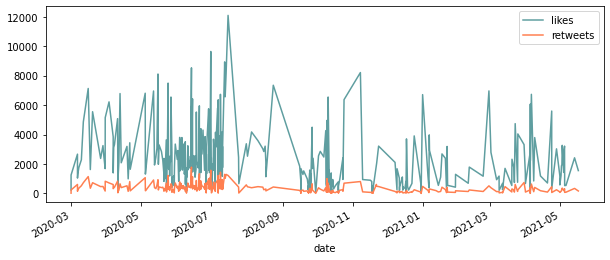

In [ ]:
tfav.plot(figsize = (10,4), label = "likes", legend = True, color = 'cadetblue')
tret.plot(figsize = (10,4), label = "retweets", legend = True, color = 'coral')

In [ ]:
# Jak długie były tweety?
df_pad['len'] = df_pad['tweets'].apply(len)

In [ ]:
mean = np.mean(df_pad['len'])
print("Średnia długość tweeta (w znakach):" + str(round(mean, 2)))

Średnia długość tweeta (w znakach): 219.57


In [ ]:
# Alternatywny sposób formatowania napisów:
print("Średnia długość tweeta (w znakach): {:.2f}".format(mean))

Średnia długość tweeta (w znakach): 219.57


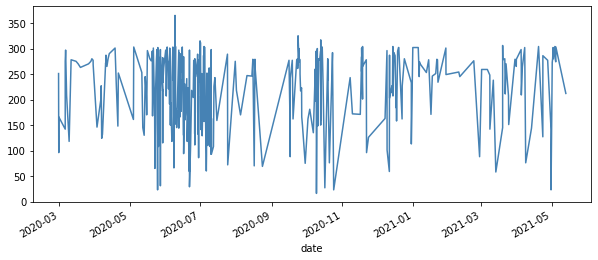

In [ ]:
tlen = pd.Series(data = df_pad['len'].values, index = df_pad['date'])
tlen.plot(figsize = (10,4), color = 'steelblue')

### #Hasztagi i @wzmianki

In [ ]:
# Wyciągamy hasztagi, korzystając z wyrażeń regularnych:
hashtags = []
hashtag_pattern = re.compile(r"#\w+")
hashtag_matches = list(df_pad['tweets'].apply(hashtag_pattern.findall))

**Słownik wyrażeń regularnych (regex):**

  - `^` - rozpoczyna się od
  - `$` - kończy się na
  - `d` - dowolna cyfra
  - `w` - dowolna cyfra lub litera lub znak podkreślenia
  - `s` - tzw. znaki niedrukowane (*white spaces*), czyli spacja, tabulacja, koniec linii
  - `()` - grupowanie
  - `|` - alternatywa (lub)
  - `[]` - wymienia dozwolone znaki
  - `[^]` - wymienia niedozwolone znaki
  - `*` - poprzedni znak zostanie powtórzony zero lub więcej razy
  - `+` - poprzedni znak zostanie powtórzony jeden lub więcej razy
  - `?` - poprzedni znak zostanie powtórzony zero lub jeden raz
  - `{n}` - poprzedni znak zostanie powtórzony n razy
  - `.` - dowolny znak oprócz nowej linii (\n)
  - `\` - pozwala na użycie znaków specjalnych



In [ ]:
# Tworzymy słownik zawierający wszystkie znalezione hasztagi, gdzie kluczem będzie hasztag, a wartością liczba wystąpień danego hasztagu. 
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch] + 1

In [ ]:
hashtag_dict

{'#100lat': 1,
 '#30Sausio13': 1,
 '#31': 2,
 '#4czerwca': 1,
 '#590': 1,
 '#5latPAD': 1,
 '#AmbitnaPolska': 21,
 '#Bieszczady': 1,
 '#COVID19': 7,
 '#Covid19': 6,
 '#DUDA2020': 1,
 '#DUDA202O': 1,
 '#DzieńRotmistrza': 1,
 '#DzieńStrazaka': 1,
 '#EkoKarty': 1,
 '#FIFAFootballAwards': 1,
 '#GrarantannaCup': 1,
 '#Grudzień70': 1,
 '#Hot16Challenge2': 1,
 '#January13': 1,
 '#Jordan': 2,
 '#KartaRodziny': 3,
 '#Katyn': 1,
 '#KingAbdullahll': 1,
 '#Lithuania': 1,
 '#Litwa': 1,
 '#Mattarella': 2,
 '#MiamiOpen': 1,
 '#MiędzynarodowyDzieńStrażaka': 1,
 '#MostyDlaRegionów': 1,
 '#NarodowyProgramSzczepień': 1,
 '#NeverForget': 3,
 '#Pamietamy': 1,
 '#PieknaPolska': 1,
 '#PięknaPolska': 2,
 '#Poland': 1,
 '#PolskaPelnaPasji': 1,
 '#PolskaPiękna': 2,
 '#PolskieSprawy': 7,
 '#ProduktPolski': 1,
 '#RHCJO': 1,
 '#SARS_CoV_2': 1,
 '#SilnaPolska': 3,
 '#Smolensk': 1,
 '#SzczepimySię': 1,
 '#TarczaAntykryzysowa': 1,
 '#ThankYouJohnPaul2': 1,
 '#USA': 1,
 '#USSR': 1,
 '#WojskaSpecjalne': 2,
 '#WorldHealt

In [ ]:
# Sortujemy słownik według wartości (od najwyższych do najniższych) i rozdzielamy wartości i klucze, tworząc dwie osobne listy. Następnie wyciągamy 20 najczęściej używanycn hasztagów wraz z liczbą wystąpień:
hashtag_ordered_list = sorted(hashtag_dict.items(), key = lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]

hashtag_ordered_values = []
hashtag_ordered_keys = []

for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

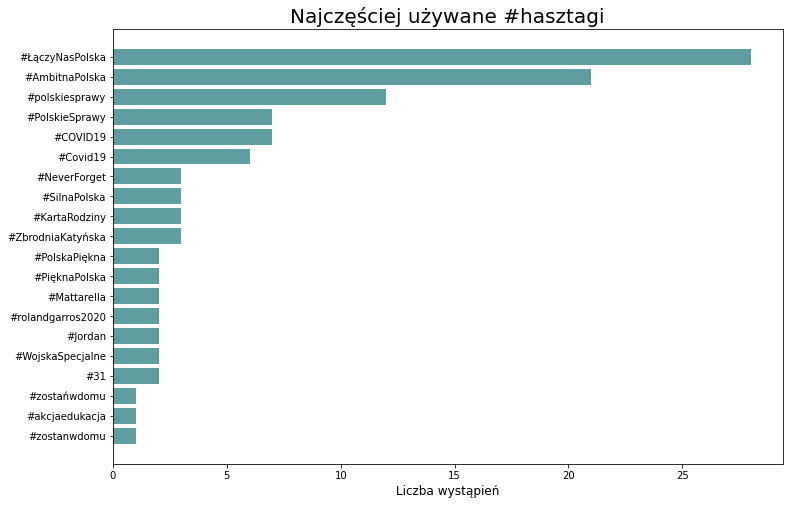

In [ ]:
# Tworzymy wykres słupkowy:
fig, ax = plt.subplots(figsize = (12,8))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], color = 'cadetblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Liczba wystąpień", fontsize = 12)
ax.set_title("Najczęściej używane #hasztagi", fontsize = 20)
plt.show()

In [ ]:
# Tworzymy chmurę hasztagów. Zaczynamy od słownika:
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]

hashtag_ordered_dict

{'#31': 2,
 '#AmbitnaPolska': 21,
 '#COVID19': 7,
 '#Covid19': 6,
 '#Jordan': 2,
 '#KartaRodziny': 3,
 '#Mattarella': 2,
 '#NeverForget': 3,
 '#PięknaPolska': 2,
 '#PolskaPiękna': 2,
 '#PolskieSprawy': 7,
 '#SilnaPolska': 3,
 '#WojskaSpecjalne': 2,
 '#ZbrodniaKatyńska': 3,
 '#akcjaedukacja': 1,
 '#polskiesprawy': 12,
 '#rolandgarros2020': 2,
 '#zostanwdomu': 1,
 '#zostańwdomu': 1,
 '#ŁączyNasPolska': 28}

In [ ]:
?wordcloud

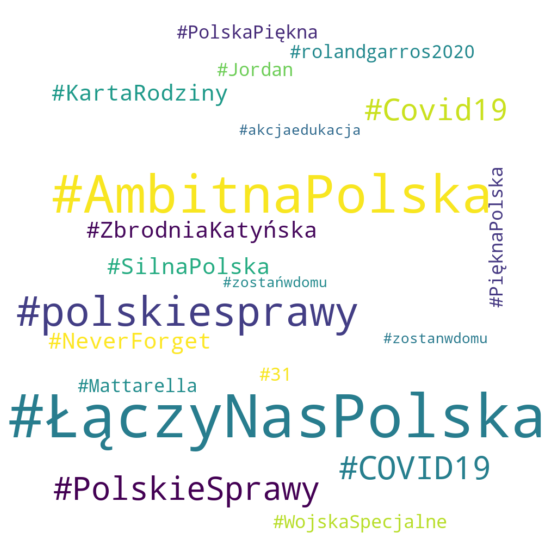

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Powtarzamy powyższe operacje dla wzmianek:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df_pad['tweets'].apply(mention_pattern.findall))

mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch] + 1

In [ ]:
mentions_ordered_list = sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]

mentions_ordered_values = []
mentions_ordered_keys = []

for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

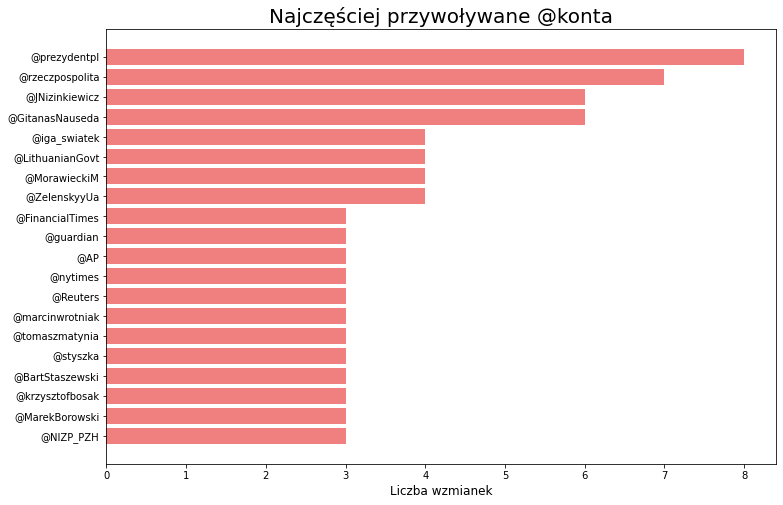

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos, list(mentions_ordered_values)[::-1], color = 'lightcoral')
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Liczba wzmianek", fontsize = 12)
ax.set_title("Najczęściej przywoływane @konta", fontsize = 20)
plt.show()

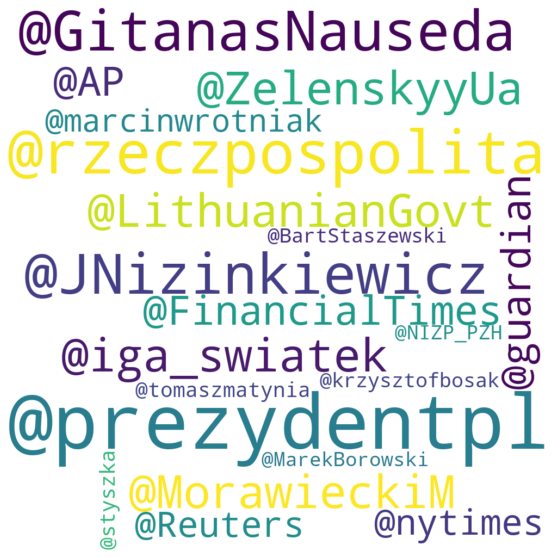

In [ ]:
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')

plt.show()

## Wykrywanie języka

In [ ]:
# Filtrowanie przy pobieraniu tweetów:
tweets_covid = tweepy.Cursor(api.search,
                       q = "coronavirus",
                       lang = "pl",
                       tweet_mode = "extended").items(200)

json_data = [t._json for t in tweets_covid]
df = pd.json_normalize(json_data)

In [ ]:
df = df[['user.screen_name', 'user.location', 'source', 'created_at', 'full_text', 'retweet_count', 'favorite_count']]
df

,user.screen_name,user.location,source,created_at,full_text,retweet_count,favorite_count
0,Grodek_,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 16:48:59 +0000 2021,RT @KarolRosenthal: Artykuł naukowy Instytutu ...,1,0
1,KarolRosenthal,Germany,"<a href=""http://twitter.com/download/iphone"" r...",Sun May 16 16:47:18 +0000 2021,"Artykuł naukowy Instytutu Salk ujawnia, że bia...",1,0
2,Robomir1,,"<a href=""http://twitter.com/download/android"" ...",Sun May 16 16:32:26 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0
3,bozena_z58,,"<a href=""http://twitter.com/download/iphone"" r...",Sun May 16 16:31:27 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0
4,bonlid2,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 15:58:02 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0
5,KazimierzSk,Świętokrzyskie,"<a href=""http://twitter.com/download/android"" ...",Sun May 16 15:45:56 +0000 2021,RT @modliszka30: Pfizer analizuje możliwość do...,51,0
6,Neta55385169,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 15:21:13 +0000 2021,Zmiana/porządek zaczyna się od chaosu\n\nCHAOS...,0,2
7,6_wilku,"Wielka Polska, Kraków","<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 15:15:36 +0000 2021,@Monika_Lind Jest też azjatycka wersja dla gad...,0,2
8,Teresa12369786,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 14:42:06 +0000 2021,"RT @koolphone: Najlepiej, że pisze to Izrael, ...",1,0
9,Marek68349467,,"<a href=""http://twitter.com/download/android"" ...",Sun May 16 14:23:39 +0000 2021,"RT @dominikacosic: KE oficjalnie przyznaje, że...",299,0


In [ ]:
# Wykrywanie języka za pomocą biblioteki langdetect
!pip install langdetect
from langdetect import detect

     |████████████████████████████████| 983kB 6.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=c9e1385615d6391e298d5658ebed91c4d1d0996ff5d7703c0a08b01bb5bcaacb
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
detect("To jest przykładowe zdanie.")

'pl'

In [ ]:
# Wyłączamy tweety najkrótsze:
df['len'] = df['full_text'].apply(len)
mask = (df['full_text'].str.len() >= 25) 
df = df.loc[mask]

In [ ]:
df['lang'] = df['full_text'].apply(detect)

In [ ]:
# Zapiszmy wyniki:
from google.colab import files
df.to_csv('tweety_pl.csv') 
files.download('tweety_pl.csv')

In [ ]:
df_pl = df[df.lang == 'pl']
df_pl

,user.screen_name,user.location,source,created_at,full_text,retweet_count,favorite_count,len,lang
0,Grodek_,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 16:48:59 +0000 2021,RT @KarolRosenthal: Artykuł naukowy Instytutu ...,1,0,139,pl
1,KarolRosenthal,Germany,"<a href=""http://twitter.com/download/iphone"" r...",Sun May 16 16:47:18 +0000 2021,"Artykuł naukowy Instytutu Salk ujawnia, że bia...",1,0,210,pl
2,Robomir1,,"<a href=""http://twitter.com/download/android"" ...",Sun May 16 16:32:26 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0,140,pl
3,bozena_z58,,"<a href=""http://twitter.com/download/iphone"" r...",Sun May 16 16:31:27 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0,140,pl
4,bonlid2,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sun May 16 15:58:02 +0000 2021,RT @luc_woc: Główny Patolog: „NIKT Nie Umarł Z...,26,0,140,pl
...,...,...,...,...,...,...,...,...,...
195,JadwigaSokolow1,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Sat May 15 03:56:10 +0000 2021,RT @PBeatap: ▪️Zarzuty karne wniesione przeciw...,46,0,140,pl
196,marekcook67,"Wrocław, Polska","<a href=""https://mobile.twitter.com"" rel=""nofo...",Sat May 15 03:54:10 +0000 2021,RT @PBeatap: ▪️Zarzuty karne wniesione przeciw...,46,0,140,pl
197,pawel_eddi,,"<a href=""http://twitter.com/download/android"" ...",Sat May 15 03:36:11 +0000 2021,RT @PBasiukiewicz: https://t.co/4m3vklAWuj\nRy...,14,0,139,pl
198,Pearl___s,,"<a href=""http://twitter.com/download/android"" ...",Sat May 15 03:07:07 +0000 2021,RT @PBeatap: ▪️Zarzuty karne wniesione przeciw...,46,0,140,pl


# **Zadanie:**

1.	Pobierz 1500 tweetów dotyczących wybranego zagadnienia lub 500 tweetów wybranej użytkowniczki/użytkownika. 

2.	Przekształć dane do postaci ramki danych, zachowując tylko najbardziej użyteczne informacje. 

3.	Jeśli nie zrobiłeś/-aś tego w kroku 1., usuń retweety. 

4.	Wskaż 5 tweetów o największej liczbie polubień.

5.	Wybierz tweety w języku polskim lub angielskim (w zależności od kryterium pobierania). 

6. Oblicz średnią długość tweeta.

7.	Utwórz chmurę słów ilustrującą najpopularniejsze hasztagi.

8.	Utwórz wykres ilustrujący najczęściej wymieniane konta (wzmianki). 


In [ ]:
# Miejsce na Twój kod

In [ ]:
# Miejsce na Twój kod

In [ ]:
# Miejsce na Twój kod